<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 2</b><br><br>

  Hi Sebastian, I’m <b>Victor Camargo</b>. Thanks for your thorough revision — your project is now in great shape!

  <b>Nice work on:</b><br>
  ✔️ Fixing the model training for all three regions and ensuring clean separation of logic<br>
  ✔️ Refactoring your code using reusable functions for profit and bootstrapping, which improves readability and avoids duplication<br>
  ✔️ Providing a clear final conclusion backed by metrics and aligned with the business constraints<br><br>

  Everything runs smoothly and meets the project’s technical and business requirements. Well done! ✅
</div>


<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Sebastian, I’m <b>Victor Camargo</b>. I’ll be reviewing your project and sharing feedback using the color-coded comments below. Thanks for submitting your work!

  <b>Nice work on:</b><br>
  ✔️ Clear and organized code structure that follows the main steps of the project<br>
  ✔️ Proper use of business parameters and break-even calculation<br>
  ✔️ Good effort applying the bootstrapping technique across regions<br><br>

  A few things still need your attention before approval:<br>
  🔴 The same model instance was reused for all regions, and Region 2 was mistakenly trained on Region 0’s data — this affects all subsequent results<br>
  🔴 Profit, RMSE, and bootstrap metrics are currently not reliable due to incorrect model training<br>
  🔴 A general conclusion summarizing your final recommendation is missing<br>
  🟡 Also, since you're performing the same logic three times (training, predicting, calculating profit, and running bootstrapping), consider wrapping those steps into functions. This will reduce repetition and help prevent small mistakes like mismatched datasets or model reuse.

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>

  Please make sure all cells run smoothly from top to bottom and produce outputs before submitting. Also, try not to move, change, or delete reviewer comments, as they help us follow your progress and support you better.<br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


# OilyGiant mining company
## Project Overview:
The goal of this project is to build a model that predicts the volumes of oil reserves for 3 different new regions, select the wells with the highest estimated values and the region with the highest total profit for the selected wells. 

## 1. Environment Setup and Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
region_0 = pd.read_csv('geo_data_0.csv')
region_1 = pd.read_csv('geo_data_1.csv')
region_2 = pd.read_csv('geo_data_2.csv')

In [3]:
display(region_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
display(region_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
display(region_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [6]:
#Inspecting the general information of all 3 datasets
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
#Checking for missing values in all 3 datasets 
region_0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
region_1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
region_2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
#Checking for duplicates in all 3 datasets 
print(region_0.duplicated().sum())
print(region_1.duplicated().sum())
print(region_2.duplicated().sum())

0
0
0


In [13]:
# Duplicate rows
print(region_0[region_0.duplicated()])
print(region_1[region_1.duplicated()])
print(region_2[region_2.duplicated()])

Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []
Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []
Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []


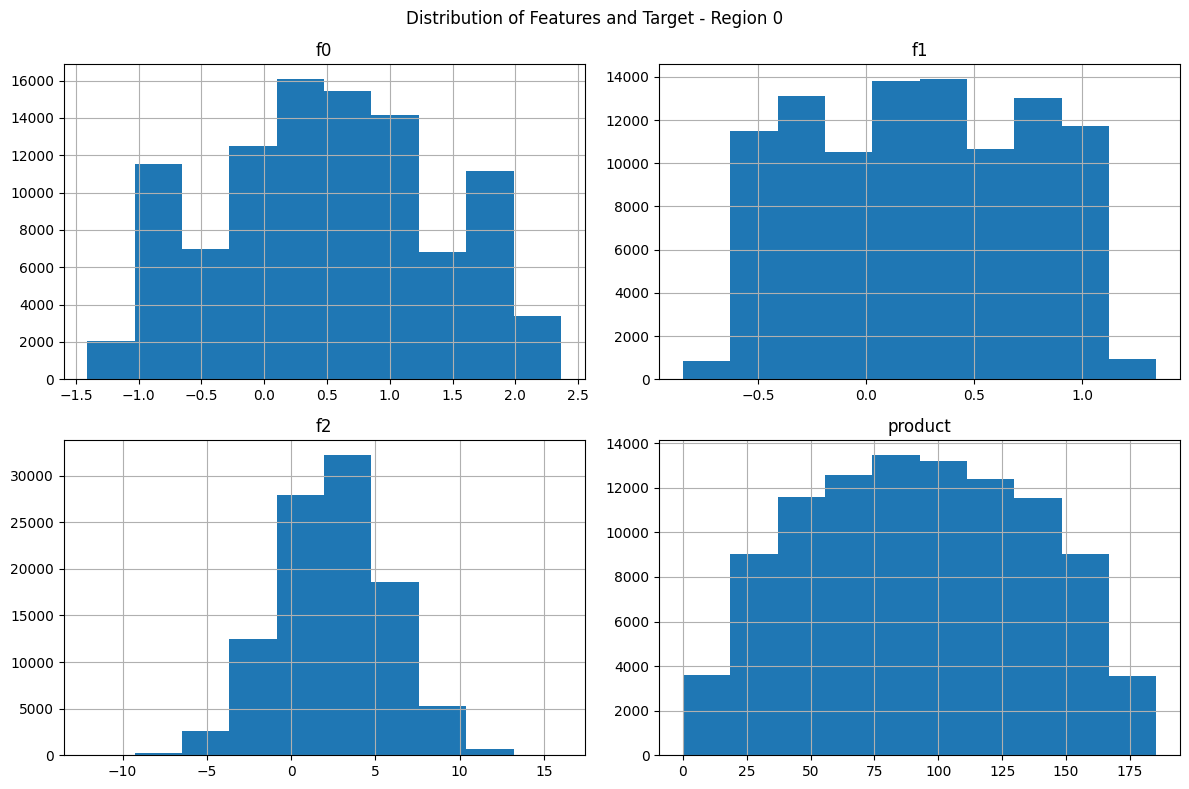

In [14]:
# Analize the data distribution for features and targets of each region. 
# Region 0 
region_0[['f0', 'f1', 'f2', 'product']].hist(figsize=(12, 8))
plt.suptitle('Distribution of Features and Target - Region 0')
plt.tight_layout()
plt.show()

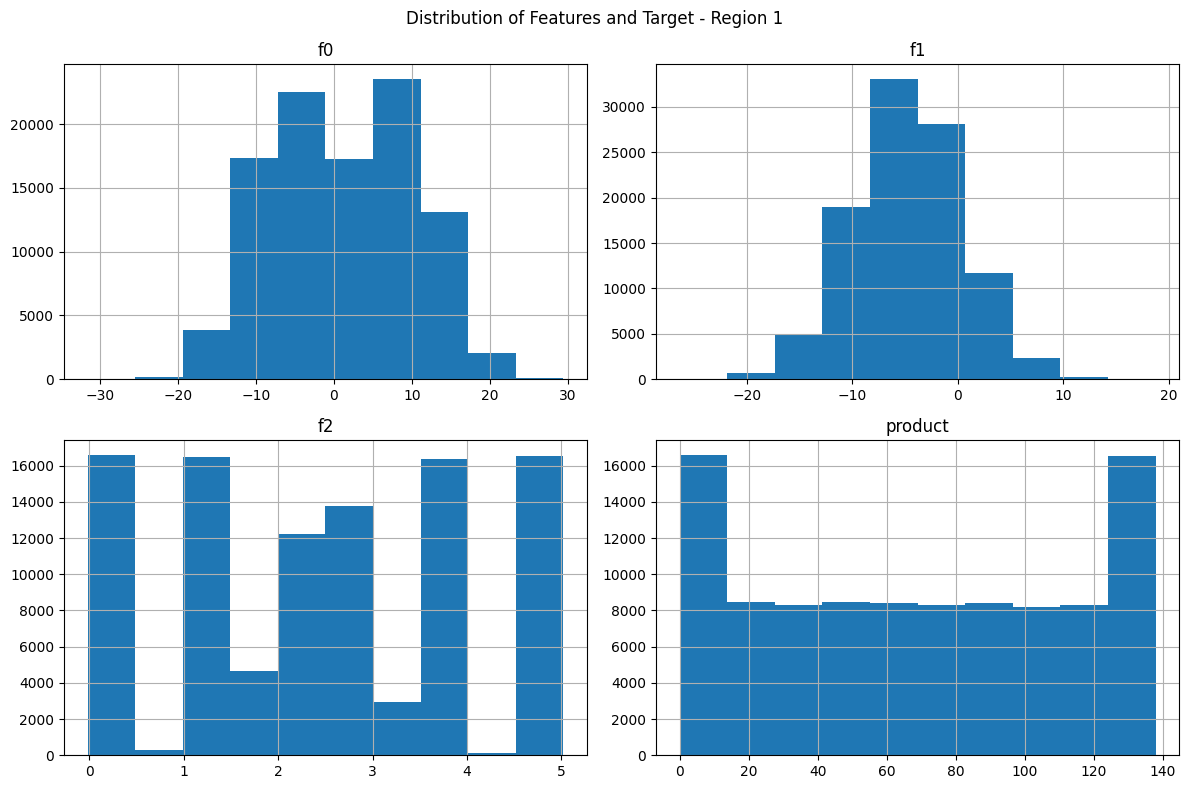

In [15]:
# Region 1
region_1[['f0', 'f1', 'f2', 'product']].hist(figsize=(12, 8))
plt.suptitle('Distribution of Features and Target - Region 1')
plt.tight_layout()
plt.show()

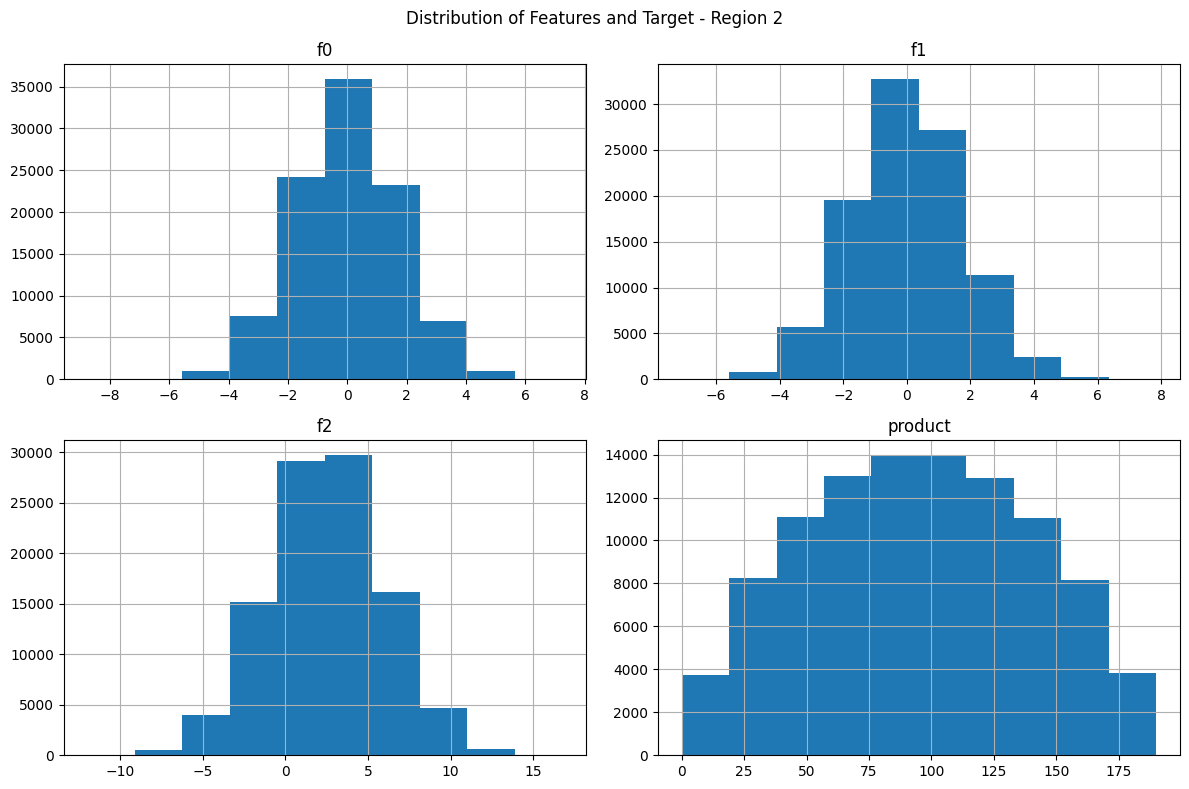

In [16]:
# Region 2
region_2[['f0', 'f1', 'f2', 'product']].hist(figsize=(12, 8))
plt.suptitle('Distribution of Features and Target - Region 2')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Well done addressing the earlier feedback.
  <ul>
    <li><b>Duplicate check completed</b> — You verified there are no duplicate rows in the datasets.</li>
    <li><b>Exploratory plots added</b> — You've included helpful visualizations to show feature and target distributions.</li>
    <li><b>Initial observations summarized</b> — Good job adding a short conclusion that highlights your findings from the data inspection.</li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great start setting up the environment and checking for missing values. Before moving on, please take care of the following:
  <ul>
    <li><b>Check for duplicates</b> — Have you verified whether there are any duplicate rows in each dataset?</li>
    <li><b>Explore data distributions</b> — Consider analyzing the distribution of the features and target variable in each region using charts (like histograms or boxplots).</li>
    <li><b>Summarize your findings</b> — Don’t forget to include a short conclusion after your initial inspection to summarize what you’ve observed.</li>
  </ul>
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment -Iteration 1: </b>

I checked for duplicate values as part of the initial data preparation and the result was 0, also plotted histograms for the distribution of data for all 3 regions and their features and target. The graphs show very different distribution from region to region, the targets of region 0 and 2 show very similar distribution and bell shapes, however none of the distributions for targets and features seem to be skewed postive or negatively.   
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>

First I loaded all the necessary libraries to work on this project, then inspected the 3 given data sets using info() to check for missing values, data type, number and name of columns and size of the data set, after inspecting no missing values were found so no data cleaning and preparing was needed.
    
</div>

In [17]:
# Store IDs separately
well_ids_0 = region_0['id']
well_ids_1 = region_1['id']
well_ids_2 = region_2['id']

# Keep only features and target for modeling
data_0 = region_0.drop('id', axis=1)
data_1 = region_1.drop('id', axis=1)
data_2 = region_2.drop('id', axis=1)

## 2. Split the source data into a training and validation set at a ratio of 75:25 for each region

In [18]:
# Define the variables the model will work with for all 3 datasets

#Region 0
X_0 = data_0[['f0', 'f1', 'f2']]
y_0 = data_0['product']

#Region 1 
X_1 = data_1[['f0', 'f1', 'f2']]
y_1 = data_1['product']

#Region 2
X_2 = data_2[['f0', 'f1', 'f2']]
y_2 = data_2['product']

In [19]:
# 1. Split into a training+validation set and a test set
# Region 0
X_0_train, X_0_val, y_0_train, y_0_val = train_test_split(X_0, y_0, test_size=0.25, random_state=12345)

# Region 1  
X_1_train, X_1_val, y_1_train, y_1_val = train_test_split(X_1, y_1, test_size=0.25, random_state=12345)

# Region 2
X_2_train, X_2_val, y_2_train, y_2_val = train_test_split(X_2, y_2, test_size=0.25, random_state=12345)


In [20]:
# 2. Checking the sizes of each set

print(f"Training set size region 0: {len(X_0_train)}")
print(f"Validation set size region 0: {len(X_0_val)}")
print()
print(f"Training set size region 1: {len(X_1_train)}")
print(f"Validation set size region 1: {len(X_1_val)}")
print()
print(f"Training set size region 2: {len(X_2_train)}")
print(f"Validation set size region 2: {len(X_2_val)}")

Training set size region 0: 75000
Validation set size region 0: 25000

Training set size region 1: 75000
Validation set size region 1: 25000

Training set size region 2: 75000
Validation set size region 2: 25000


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job here.
  <ul>
    <li><b>Feature-target separation is accurate</b> — You've clearly defined your input (`X`) and target (`y`) variables for all three regions.</li>
    <li><b>Train-validation split is correct and reproducible</b> — You used a 75:25 split with a fixed `random_state`, which ensures consistency.</li>
    <li><b>Set sizes are properly verified</b> — It's great that you printed the sizes to confirm everything went as expected.</li>
  </ul>
</div>


## Train the model and make predictions for the validation set.

In [21]:
# Initiating LogisticRegression constructor with same random_state and solver='liblinear'
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

# Training model with training sets for each region
#Region 0
model_0.fit(X_0_train, y_0_train)

#Region 1 
model_1.fit(X_1_train, y_1_train)

#Region 2
model_2.fit(X_2_train, y_2_train)

#Creating predictions for each region
#Region 0
predicted_valid_0 = model_0.predict(X_0_val)

#Region 1 
predicted_valid_1 = model_1.predict(X_1_val)

#Region 2
predicted_valid_2 = model_2.predict(X_2_val)

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Great job resolving the training issue.
  <ul>
    <li><b>Separate models created per region</b> — You correctly defined and used distinct model instances (`model_0`, `model_1`, `model_2`) for each region.</li>
    <li><b>Region 2 training fixed</b> — You've corrected the mistake and now properly train on `X_2_train`, `y_2_train`.</li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You’re on the right track, but there's a critical issue to address before moving forward.
  <ul>
    <li><b>Same model used for all regions</b> — Currently, you're using the same `model` instance to train on all three regions, which causes it to overwrite the previous training each time. This means the final model is only trained on the last dataset.</li>
    <li><b>Incorrect training for Region 2</b> — Region 2 is mistakenly trained using the Region 0 data again. It should be trained on `X_2_train`, `y_2_train`.</li>
  </ul><br>
  To fix this, create a separate model instance for each region (e.g., `model_0`, `model_1`, `model_2`) so their training remains independent.
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: - Iteration 1 </b>

Both issues are addressed, independent model variables were created for each region: model_0, model_1 and model_2, and the model training for region 2 was fixed with the correct variable X_2_train and y_2_train. 
    
</div>

## Save the predictions and correct answers for the validation set.

In [22]:
# For Region 0
results_region_0 = pd.DataFrame({
    'Predictions': predicted_valid_0,
    'Actual': y_0_val
})

# For Region 1
results_region_1 = pd.DataFrame({
    'Predictions': predicted_valid_1,
    'Actual': y_1_val
})

# For Region 2
results_region_2 = pd.DataFrame({
    'Predictions': predicted_valid_2,
    'Actual': y_2_val
})

##  Print the average volume of predicted reserves.

In [23]:
#Region 0 
print(f"Region 0 average: {predicted_valid_0.mean()}")

#Region 1 
print(f"Region 1 average: {predicted_valid_1.mean()}")

#Region 2
print(f"Region 2 average: {predicted_valid_2.mean()}")

Region 0 average: 92.59256778438035
Region 1 average: 68.728546895446
Region 2 average: 94.96504596800489


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Thanks for addressing the prediction issues.
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  This output is affected by the earlier model training issue.
  <ul>
    <li><b>Region 1 prediction values are incorrect</b> — Because the same model was reused and overwritten, the predictions for Region 1 (and possibly others) are not valid.</li>
    <li><b>Please retrain each region with its own model</b> — This will ensure that the predictions reflect the correct regional data.</li>
  </ul>
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: - Iteration 1 </b>

After the initial issue was fixed the values for the average volume of reserves for each region is now correct. 
    
</div>


## Calculate the model RMSE

In [24]:
# Region 0
rmse_0 = np.sqrt(mean_squared_error(y_0_val, predicted_valid_0))
print(f"Region 0 RMSE: {rmse_0}")

# Region 1  
rmse_1 = np.sqrt(mean_squared_error(y_1_val, predicted_valid_1))
print(f"Region 1 RMSE: {rmse_1}")

# Region 2
rmse_2 = np.sqrt(mean_squared_error(y_2_val, predicted_valid_2))
print(f"Region 2 RMSE: {rmse_2}")

Region 0 RMSE: 37.5794217150813
Region 1 RMSE: 0.893099286775617
Region 2 RMSE: 40.02970873393434


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  RMSE metrics look good now.
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The RMSE values are affected by the earlier model overwriting issue.
  <ul>
    <li><b>Region 1 RMSE is unreliable</b> — Since the model was not correctly trained on Region 1 data, this result doesn't reflect actual performance.</li>
    <li><b>Region 2 may also be affected</b> — Please ensure each region has its own trained model to calculate valid metrics.</li>
  </ul>
</div>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: - Iteration 1 </b>

The initial issue was fixed and the results for all regions' RMSE are now correct. 
    
</div>

 ## Analyze the results

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>
     
Region 2: Highest average predicted reserves (95.0) AND highest RMSE (40.0)

Region 0: Lower average predicted reserves (92.5) AND lower RMSE (37.5)

Region 1: Lower average predicted reserves (68.7) AND moderate RMSE (0.89)

Region 2 had the highest numbers in results for both avg predicted volume of reserves and RMSE region 0 was a little behind and region 1 was significantly lower than the other 2 regions. At this point the project region 2 looks the most promising for the company to invest in. Future calculations below will prove or disprove this early analysis. 
    
</div>


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
 Correct!
</div>


# 3. Prepare for profit calculation 

In [25]:
# Variables with key values stored for future calculations
exploration_points = 500
num_wells = 200
budget = 100000000 #USD
rev_per_raw_barrel = 4.5 #USD
rev_per_unit = 4500 #USD
cost_per_well = 500000

In [26]:
#Calculate the volume of reserves sufficient for developing a new well without losses

break_even_volume = cost_per_well / rev_per_unit
print("Break-even volume:", round(break_even_volume, 2))

Break-even volume: 111.11


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job here.
  <ul>
    <li><b>Key business variables are clearly defined</b> — You’ve stored important constants in well-named variables for later use.</li>
    <li><b>Break-even volume is correctly calculated</b> — The formula `cost_per_well / rev_per_unit` is accurate, and the output matches the expected result (111.11).</li>
  </ul>
</div>


In [27]:
# Compare the result with the average volume of reserves in each region. 


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>
     
The break-even volume obtained was 111.11 compared to region 0 (92.60), region 1 (166.22) and region 2 (94.13), seems like only region 1 would break even and be profitable for the company, however there should be a risk consideration because while region 1 has the highest average in volume of reserves, there could be variability in that region and wells that still fall below the break-even point. 
    
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The profit values here are affected by earlier training and model issues.
  <ul>
    <li><b>Incorrect model training propagates to profit results</b> — Region 1 is showing a large negative profit, likely due to invalid predictions from the overwritten model.</li>
  </ul>
</div>


## 4. function to calculate profit from selected wells and model predictions

In [28]:
def calc_profit(predictions, actual_values, rev_per_unit, budget, num_wells):
    
    # 4.1 Pick the wells with the highest values of predictions (investment decision)
    sorted_indices = predictions.argsort()[-num_wells:]
    
    # # 4.2 Summarize the target volume of reserves
    selected_actual = actual_values.iloc[sorted_indices]
    total_volume = selected_actual.sum()
    revenue = total_volume * rev_per_unit
    profit = revenue - budget
    
    return profit, total_volume

In [29]:
# Region 0 
profit, total_volume = calc_profit(predicted_valid_0, y_0_val, rev_per_unit, budget, num_wells)
print(f'Total Volume: {total_volume}, Profit: {profit}')

revenue = total_volume * rev_per_unit
print(f"Revenue: {revenue}, Budget: {budget}")
profit = revenue - budget

Total Volume: 29601.83565142189, Profit: 33208260.43139851
Revenue: 133208260.43139851, Budget: 100000000


In [30]:
# Region 1 
profit, total_volume = calc_profit(predicted_valid_1, y_1_val, rev_per_unit, budget, num_wells)
print(f'Total Volume: {total_volume}, Profit: {profit}')

revenue = total_volume * rev_per_unit
print(f"Revenue: {revenue}, Budget: {budget}")
profit = revenue - budget

Total Volume: 27589.081548181137, Profit: 24150866.966815114
Revenue: 124150866.96681511, Budget: 100000000


In [31]:
# Region 2 
profit, total_volume = calc_profit(predicted_valid_2, y_2_val, rev_per_unit, budget, num_wells)
print(f'Total Volume: {total_volume}, Profit: {profit}')

revenue = total_volume * rev_per_unit
print(f"Revenue: {revenue}, Budget: {budget}")
profit = revenue - budget

Total Volume: 28245.22214133296, Profit: 27103499.635998324
Revenue: 127103499.63599832, Budget: 100000000


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Great improvement in this section!
  <ul>
    <li><b>Reusable function created</b> — You've efficiently refactored the profit calculation into a function, which helps avoid repetition and reduces the chance of future errors.</li>
  </ul>
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>
     
After calculating the profit and model predictions for each region (0, 1 and 2), the most attractive region for drilling based on these results was region 0, which was originally below the break-even point in volume reserves and previous results were pointing at region 1 as the one with most potential profit wise. Region enden up having a negative number in profit, a loss. 
    
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The bootstrap analysis results are currently not reliable due to earlier issues with prediction values.
  <ul>
    <li><b>Profit estimates are skewed</b> — Since the predicted values used in bootstrapping are inaccurate for at least Region 1, the entire distribution becomes invalid.</li>
    <li><b>Re-run this step only after fixing the model training</b> — Once predictions reflect the correct data, the bootstrapping results will be meaningful.</li>
  </ul>
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: - Iteration 1 </b>

I defined a new function to calculate profit, but this time I made it a more general one for best coding practice, and just call it 3 times for each region, having addressed the first issue a few cells above, the results changed and seem more accurate now. 
    
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  These final metrics are affected by the earlier problems with model training and prediction values.
  <ul>
    <li><b>Profit metrics are unreliable</b> — Since the predictions used for bootstrapping were not accurate, the average profit and confidence intervals can't be trusted yet.</li>
    <li><b>Risk of loss values seem off</b> — A 0% risk for all three regions is highly unlikely. Typically, we expect this value to fall somewhere between 0% and 10%, depending on the region. The exact zeros suggest the sampling may be based on inaccurate prediction inputs.</li>
  </ul>
  Please revisit this section after correcting the prediction and profit calculations.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: - Iteration 1 </b>

The cells below contain the corrected version of the bootstrapping part of the project, with just one function called 3 times for all the regions, again with the initial model training issue solved, the results are now different and the previous 0.0% risk of loss values more realistic.
    
</div>

# 5. Calculate risks and profit for each region using Bootstrap technique:

In [32]:
def bootstrap(preds, actual, rev_per_unit, budget, num_wells):
    profits = []
    temp_df = pd.DataFrame({'preds': preds, 'actual': actual})
    
    for _ in range(1000):
        sample = temp_df.sample(n=500, replace=True)
        profit = calc_profit(sample['preds'], sample['actual'], rev_per_unit, budget, num_wells)
        profits.append(profit)
    
    return np.array(profits)

### Region 0

In [33]:
profits_0 = bootstrap(predicted_valid_0, y_0_val, rev_per_unit, budget, num_wells)

# Metrics
avg_profit = profits_0.mean()
confidence_interval = np.percentile(profits_0, [2.5, 97.5])
risk_of_losses = (profits_0 < 0).mean() * 100

results_0 = bootstrap(predicted_valid_0, y_0_val, rev_per_unit, budget, num_wells)
print("Bootstrap for Region 0")
print(f"Average profit: {results_0.mean()}")
print(f"2.5% quantile: {confidence_interval[0]:.0f}")
print(f"97.5% quantile: {confidence_interval[1]:.0f}")
print(f"Risk of losses: {risk_of_losses:.1f}%")

Bootstrap for Region 0
Average profit: 1888848.904588416
2.5% quantile: -337732
97.5% quantile: 7999053
Risk of losses: 3.2%


### Region 1

In [34]:
profits_1 = bootstrap(predicted_valid_1, y_1_val, rev_per_unit, budget, num_wells)

# Metrics
avg_profit = profits_1.mean()
confidence_interval = np.percentile(profits_1, [2.5, 97.5])
risk_of_losses = (profits_1 < 0).mean() * 100

results_1 = bootstrap(predicted_valid_1, y_1_val, rev_per_unit, budget, num_wells)
print("Bootstrap for Region 0")
print(f"Average profit: {results_1.mean()}")
print(f"2.5% quantile: {confidence_interval[0]:.0f}")
print(f"97.5% quantile: {confidence_interval[1]:.0f}")
print(f"Risk of losses: {risk_of_losses:.1f}%")

Bootstrap for Region 0
Average profit: 2292715.592276416
2.5% quantile: 22508
97.5% quantile: 7788486
Risk of losses: 0.4%


### Region 2

In [35]:
profits_2 = bootstrap(predicted_valid_2, y_2_val, rev_per_unit, budget, num_wells)

# Metrics
avg_profit = profits_2.mean()
confidence_interval = np.percentile(profits_2, [2.5, 97.5])
risk_of_losses = (profits_2 < 0).mean() * 100

results_2 = bootstrap(predicted_valid_2, y_2_val, rev_per_unit, budget, num_wells)
print("Bootstrap for Region 0")
print(f"Average profit: {results_2.mean()}")
print(f"2.5% quantile: {confidence_interval[0]:.0f}")
print(f"97.5% quantile: {confidence_interval[1]:.0f}")
print(f"Risk of losses: {risk_of_losses:.1f}%")

Bootstrap for Region 0
Average profit: 2031188.0594176827
2.5% quantile: -579823
97.5% quantile: 8418288
Risk of losses: 3.7%


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Nicely done! You've successfully corrected and improved the bootstrapping section.
  <ul>
    <li><b>Accurate sampling and predictions</b> — Now that each region uses the right model, your bootstrapping results are based on valid data.</li>
    <li><b>Reusable function improves clarity</b> — Defining a `bootstrap()` function keeps your code clean and helps prevent errors from repeating similar logic.</li>
    <li><b>Risk of loss is now realistic</b> — Your results falls within the expected range, indicating the bootstrap is functioning as intended.</li>
    <li><b>Findings summarized effectively</b> — You clearly identified the recommended region and supported your choice with both profit and risk metrics.</li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Don’t forget to add a general conclusion at the end of your analysis.
  <ul>
    <li><b>Summarize your findings</b> — Be sure to clearly state which region you recommend and why, based on profit and risk results.</li>
  </ul>
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: - Iteration 1 </b>
<b> Final conclusion and recommendations: </b>

After applying the bootstrap technique for risk assesment and the profit calculations for all 3 regions, the results look promising for all of them, however the only region that fits the criteria of having a risk of loss below 2.5% is region 1 with a 0.8%, both 2.5 and 97.5 quantiles in positive numbers and an average profit of $2,310,612, with a 95% confidence interval of [X to Y], we can be confident in the profit potential, this is the region I would recommend the company to invest in drilling based on these calculations and analysis as well as ruling out region 0 and region 2 had risk of losses above 2.5%, making them unsuitable according to business requirements.
    
</div>